# Olivetti Faces EDA

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import joblib
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

## Downloading Dataset

In [3]:
rawdata = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\pi314\scikit_learn_data


In [5]:
rawdata.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [7]:
print(rawdata.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   =====================
    Classes    

In [9]:
rawdata.data.shape,rawdata.images.shape,rawdata.target.shape

((400, 4096), (400, 64, 64), (400,))

We can see that the 'data' in the raw data Bunch object contains the flattened X dataset with 4096 features.\
The 'images' is a 3D array containing the 2D array of each of the picture.\
The 'target' is a 1D array containing the label of each of the sample.

## Preparing X and y Datasets

In [13]:
X_raw = rawdata.data
y_raw = rawdata.target
rawimages = rawdata.images

### Storing Raw Dataset

In [15]:
joblib.dump(rawdata,"Datasets/Raw Data/olivetti faces rawdata.pkl",compress=9)
joblib.dump(rawimages,"Datasets/Raw Data/rawimages.pkl",compress=9)
joblib.dump(X_raw,"Datasets/Raw Data/X_raw.pkl",compress=9)
joblib.dump(y_raw,"Datasets/Raw Data/y_raw.pkl",compress=9)

['Datasets/Raw Data/y_raw.pkl']

## Splitting Train and Test Datasets

Given the small dataset sample size, we need to split the dataset into train and test sets with stratification so we can maintain the same distribution of classes among two datasets.

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X_raw,y_raw,test_size=0.2,stratify=y_raw)

In [64]:
pd.DataFrame(y_train).value_counts().mean(),pd.DataFrame(y_test).value_counts().mean()

(8.0, 2.0)

The distribution is maintained well after the splitting.

### Storing the Datasets

We are storing the training and test datasets as CSV format instead of pickle file so that it is readable out of python environment.

In [66]:
pd.DataFrame(X_train).to_csv("Datasets/X_train.csv")
pd.DataFrame(y_train).to_csv("Datasets/y_train.csv")
pd.DataFrame(X_test).to_csv("Datasets/X_test.csv")
pd.DataFrame(y_test).to_csv("Datasets/y_test.csv")

## Initial Insights

Let's plot two images from each class so we can visualize how our images look like.

In [34]:
images_to_display.shape

(40, 64, 64)

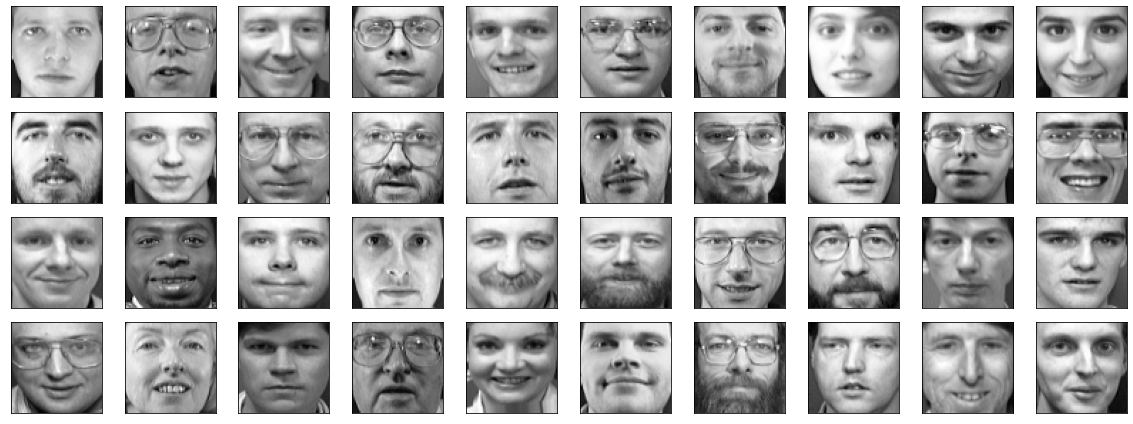

In [53]:
images_to_display = rawimages[np.unique(y_raw,return_index=True)[1]]
fig,axs = plt.subplots(4,10,figsize=(16,6),tight_layout=True,facecolor='white')

for image,ax in zip(images_to_display,axs.flat):
    ax.imshow(image,cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])

## Principal Component Analysis

Let's try how much we can reduce the dimentionality to maintain as much as information in the images.

In [82]:
pca = PCA(n_components=300).fit(X_raw.copy())

In [83]:
np.argmax(np.cumsum(pca.explained_variance_ratio_) > 0.99)

260

We can reduce the number of dimensions down to 260 to keep 99% of the information.

In [90]:
pca = PCA(n_components=260).fit(X_train.copy())

In [93]:
X_train_pca = pca.transform(X_train)

In [110]:
X_train_pca.shape

(320, 260)

In [98]:
X_train_pca_inv = pca.inverse_transform(X_train_pca)

In [99]:
X_train_pca_inv.shape

(320, 4096)

In [105]:
def display_images(X,y):
    images_to_display = X[np.unique(y,return_index=True)[1]]
    fig,axs = plt.subplots(4,10,figsize=(16,6),tight_layout=True,facecolor='white')

    for image,ax in zip(images_to_display,axs.flat):
        ax.imshow(image.reshape(64,64),cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])

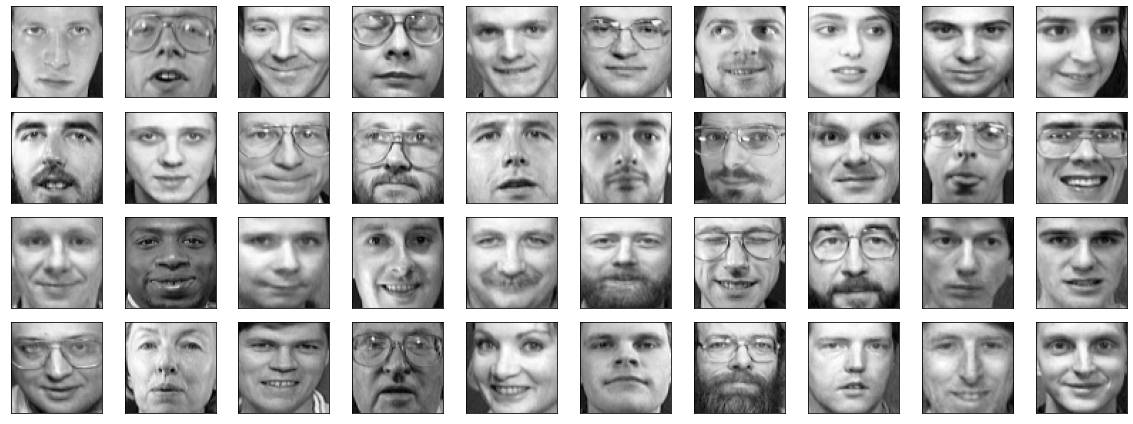

In [107]:
display_images(X_train_pca_inv,y_train)

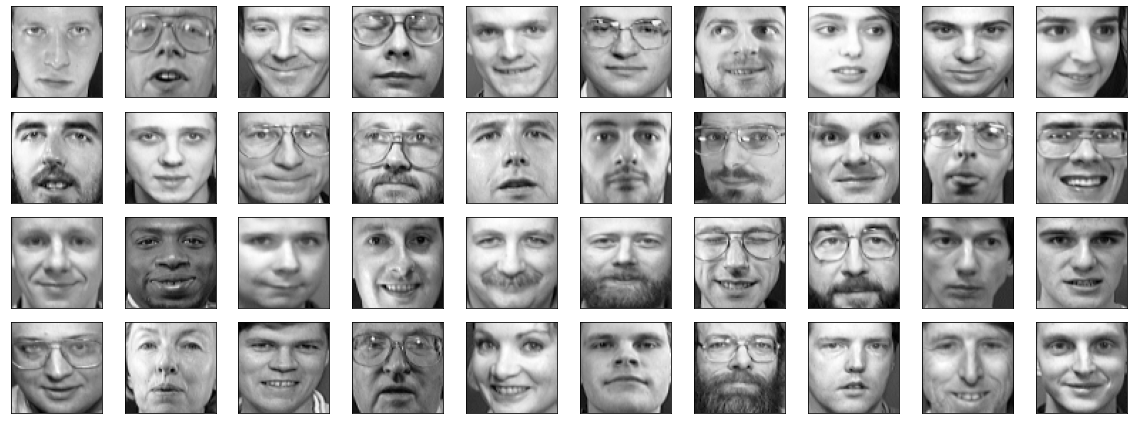

In [108]:
display_images(X_train,y_train)

There's almost no difference visually between the PCA transformed and the raw images.